In [2]:
%matplotlib inline

In [6]:
#llamo las librerias a utilizar (numpy y matplotlib)-----------------
import numpy as np
import matplotlib.pyplot as plt

#creo dos arrays con los valores de x e y----------------------------
xn=np.array([8.87, 8.29, 8.49, 8.75, 8.86,
    9.23, 10.75, 10.00, 10.15, 10.01])

yn=np.array([0.31, -0.13, -0.06, -0.31,
    0.35, 0.20, 1.80, 0.57, 1.11, 1.61])

#obtengo el valor de n (numero de datos)
n=len(xn)

#Hago las sumatorias y demas operaciones-----------------------------
Sum_x=sum(xn)
Sum_y=sum(yn)
Sum_xx=sum(xn**2)
Sum_xy=sum(xn*yn)

#imprimo los valores para verlos-------------------------------------
print(Sum_x, Sum_y, Sum_xx, Sum_xy)

93.4 5.45 878.5212 55.8297


-6.9187283462 0.799114383962


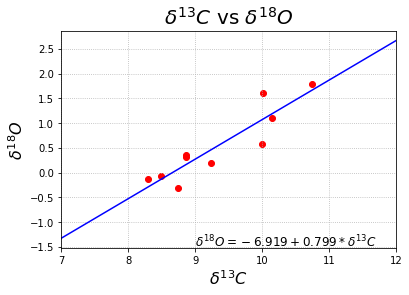

In [7]:
#ahora reemplazo en a_0 y a_1 y los imprimo  para visualizarlos------
a_0=(Sum_xx*Sum_y-Sum_xy*Sum_x)/(n*Sum_xx-Sum_x**2)
a_1=(n*Sum_xy-Sum_x*Sum_y)/(n*Sum_xx-Sum_x**2)
print(a_0, a_1)

#Genero valores para plotear la recta segun a_0 y a_1----------------
x=np.linspace(7, 12, 2)
y=a_0+a_1*x

#Grafico de los puntos y la recta de ajuste--------------------------
plt.figure(1)
plt.scatter(xn, yn, color='r')
plt.grid(linestyle='dotted')
plt.plot(x, y, color='b')
plt.title(r'$\delta ^{13}C$ vs $\delta ^{18}O$', fontsize=20)
plt.xlabel(r'$\delta ^{13}C$', fontsize=16)
plt.ylabel(r'$\delta ^{18}O$', fontsize=16)
plt.xlim(7, 12)
plt.text(9, -1.5, r'$\delta ^{18}O=-6.919+0.799*\delta ^{13}C$',
    fontsize=12)
#plt.savefig('least_square_manual.pdf') #Guardo la figura como pdf
plt.show()
#--------------------------------------------------------------------


[[-6.91872835]
 [ 0.79911438]]


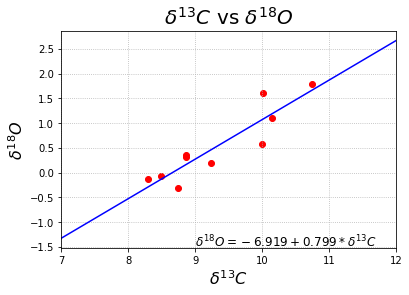

In [9]:
#este script esta basado en uno similar en el sitio Wikipedia
#https://en.wikipedia.org/wiki/Linear_least_squares_(mathematics)----
#Primero llamamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt

#Generamos los datos como un array de numpy--------------------------
datos = np.array([
    [8.87, 0.31],
    [8.29,-0.13],
    [8.49,-0.06],
    [8.75,-0.31],
    [8.86, 0.35],
    [9.23, 0.20],
    [10.75,1.80],
    [10.00,0.57],
    [10.15,1.11],
    [10.01,1.61]
    ])

#Determinamos el valor de m con len(m)-------------------------------
m = len(datos)


#Creamos la matriz A-------------------------------------------------
#np.ones(m) crea un array de numeros "1" con "m" elementos
#Con eso, mas los valores de xn (datos) creamos la matriz A
#Ademas usamos "np.array().T" que transpone la matriz A
A = np.array([np.ones(m), datos[:, 0]]).T
#de datos tomamos los valores de yn, con "reshape" lo transformamos
#en vector columna
yn = np.array(datos[:, 1]).reshape(-1, 1)
#Usamos la funcion np.linalg.solve que hace las operaciones de
#matrix necesarias para resolver el sistema de ecuaciones que
#nos da el vector de coeficientes (xc) con valores de a_0 y a_1
xc = np.linalg.solve(A.T.dot(A), A.T.dot(yn))

#Imprimimos el valor de a_0 y a_1
print(xc)

#Graficamos----------------------------------------------------------
plt.figure(1)
x = np.linspace(7, 12, 2)
y = np.array(xc[0] + xc[1] * x)
plt.plot(x, y.T, color='b')
plt.grid(linestyle='dotted')
plt.scatter(datos[:, 0], datos[:, 1], color='r')
plt.title('d13C vs d18O')
plt.xlabel('d13C')
plt.ylabel('d18O')
plt.title(r'$\delta ^{13}C$ vs $\delta ^{18}O$', fontsize=20)
plt.xlabel(r'$\delta ^{13}C$', fontsize=16)
plt.ylabel(r'$\delta ^{18}O$', fontsize=16)
plt.xlim(7, 12)
plt.text(9, -1.5, r'$\delta ^{18}O=-6.919+0.799*\delta ^{13}C$',
    fontsize=12)
#plt.savefig('least_square_matrix.pdf')
plt.show()
#--------------------------------------------------------------------